# Initial Data Cleaning 

In [1]:
import numpy as numPy
import pandas as pd
import seaborn as sns

## Loading the data

In [2]:
dataset_2006 = pd.read_csv("C:/Users/94772/OneDrive/Documents/Programming for Data Science coursework/datasets/2006.csv.bz2")
dataset_2007 = pd.read_csv("C:/Users/94772/OneDrive/Documents/Programming for Data Science coursework/datasets/2007.csv.bz2")

## Merging the two years of data sets into a complete set

In [3]:
dataset = pd.concat([dataset_2006,dataset_2007])
dataset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


## checking for missing values

In [4]:
pd.isnull(dataset).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316047
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316047
CRSElapsedTime            998
AirTime                316047
ArrDelay               316047
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312454
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

## Removing Duplicate Rows

In [5]:
dataset.drop_duplicates(inplace=True)

## Dropping the Cancellation Code column as majority of values are null

In [6]:
dataset = dataset.drop(columns = "CancellationCode")

## Correcting the Departure and Arrival times appropriately

In [7]:
dataset = dataset[(dataset["DepTime"]<2400) & (dataset["ArrTime"] <2400)]

## Create a new column Total_Delay by adding ArrDelay and DepDelay


In [8]:
dataset['Total_Delay'] = dataset['ArrDelay'] + dataset['DepDelay']

## Saving cleaned data set to be used for other tasks

In [9]:
dataset.to_csv('cleaned_dataset.csv', index=False)

In [10]:
cleaned_dataset = pd.read_csv("C:/Users/94772/OneDrive/Documents/PROG CW - final/cleaned_dataset.csv")
cleaned_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0


# Question 1

# When is the best time of day to fly 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
delays = cleaned_dataset[['Year','Month','DayOfWeek','DepTime','ArrTime','ArrDelay','DepDelay','Total_Delay']]
delays

,Year,Month,DayOfWeek,DepTime,ArrTime,ArrDelay,DepDelay,Total_Delay
0,2006,1,3,743.0,1024.0,6.0,-2.0,4.0
1,2006,1,3,1053.0,1313.0,-5.0,0.0,-5.0
2,2006,1,3,1915.0,2110.0,-23.0,0.0,-23.0
3,2006,1,3,1753.0,1925.0,-8.0,-2.0,-10.0
4,2006,1,3,824.0,1015.0,0.0,-8.0,-8.0
...,...,...,...,...,...,...,...,...
14268890,2007,12,6,1558.0,1749.0,13.0,-7.0,6.0
14268891,2007,12,6,1902.0,2110.0,5.0,11.0,16.0
14268892,2007,12,6,1024.0,1750.0,15.0,-1.0,14.0
14268893,2007,12,6,1353.0,1658.0,36.0,38.0,74.0


## Drop rows with missing values

In [13]:
delays = delays.dropna(subset=['ArrDelay','DepDelay','Total_Delay'])

##  Add a new column to the dataframe that categorizes the departure time into time slots

In [14]:
bins = [0, 600, 1200, 1800, 2400]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
delays['TimeOfDay'] = pd.cut(delays['DepTime'], bins=bins, labels=labels, include_lowest=True)

## Group the data by time slot and find the average of ArrDelay, DepDelay, and Total_Delay

In [15]:
time_of_day = labels
avg_arr_delay = []
avg_dep_delay = []
avg_total_delay = []

for time in time_of_day:
    avg_arr_delay.append(delays[delays['TimeOfDay']==time]['ArrDelay'].mean())
    avg_dep_delay.append(delays[delays['TimeOfDay']==time]['DepDelay'].mean())
    avg_total_delay.append(delays[delays['TimeOfDay']==time]['Total_Delay'].mean())

## Create a table with time slot, average arrival delay, average departure delay, and average delay (from both columns)

In [16]:
delay_dataset = pd.DataFrame({'TimeOfDay': time_of_day,
                         'AvgArrDelay': avg_arr_delay,
                         'AvgDepDelay': avg_dep_delay,
                         'AvgTotalDelay': avg_total_delay})
print(delay_dataset)


   TimeOfDay  AvgArrDelay  AvgDepDelay  AvgTotalDelay
0      Night     8.842805    10.604547      19.447352
1    Morning     1.877114     3.231829       5.108942
2  Afternoon    10.038093    11.112278      21.150371
3    Evening    21.602716    23.011219      44.613935


## Plot a bar chart to visualize the average delay by time of day

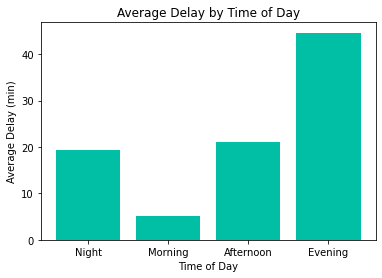

In [17]:
plt.bar(delay_dataset['TimeOfDay'], delay_dataset['AvgTotalDelay'], color = '#00bfa5')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (min)')
plt.title('Average Delay by Time of Day')
plt.show()

# When is the best time of the week to fly

## Convert the DayOfWeek column to a string for easier readability

In [18]:
delays['DayOfWeek'] = delays['DayOfWeek'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                     4: 'Thursday', 5: 'Friday', 6: 'Saturday',
                                                     7: 'Sunday'})

## Calculate the average delay for both departure and arrival

In [19]:
delays['DepDelay'] = delays['DepDelay'].fillna(0)
delays['ArrDelay'] = delays['ArrDelay'].fillna(0)
delays['AvgDepDelay'] = delays.groupby('DayOfWeek')['DepDelay'].transform('mean')
delays['AvgArrDelay'] = delays.groupby('DayOfWeek')['ArrDelay'].transform('mean')
delays['AvgTotalDelay'] = (delays['Total_Delay']).groupby(delays['DayOfWeek']).transform('mean')

## Create a table with the day of the week, average arrival delay, average departure delay, and average delay

In [20]:
delay_table = delays.groupby('DayOfWeek', as_index=False).agg({
    'AvgArrDelay': 'mean',
    'AvgDepDelay': 'mean',
    'AvgTotalDelay': 'mean'
})


## Create a DataFrame with all days of the week

In [21]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
all_days = pd.DataFrame({'DayOfWeek': days_of_week})

## Merge the all_days DataFrame with the Delay_Table

In [22]:
delay_table = pd.merge(all_days, delay_table, on='DayOfWeek', how='left')

## Display the delay table

In [23]:
print(delay_table)

   DayOfWeek  AvgArrDelay  AvgDepDelay  AvgTotalDelay
0     Monday     9.661379    11.066459      20.727838
1    Tuesday     7.221367     8.505992      15.727359
2  Wednesday     8.953476     9.739189      18.692665
3   Thursday    12.094731    12.269889      24.364620
4     Friday    12.660901    13.258466      25.919366
5   Saturday     5.495174     8.603640      14.098814
6     Sunday     9.201350    11.029420      20.230770


## Create a line plot of the average delay for each day of the week


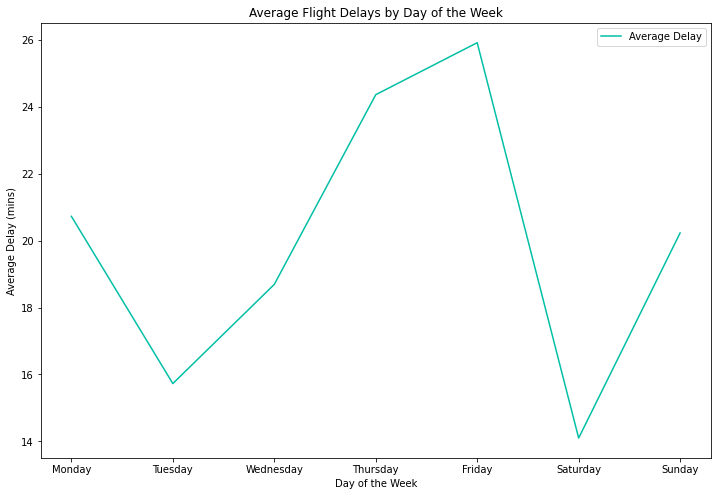

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(delay_table['DayOfWeek'], delay_table['AvgTotalDelay'], label='Average Delay', color = '#00bfa5')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (mins)')
plt.title('Average Flight Delays by Day of the Week')
plt.legend()
plt.show()

# When is the best time of the year to fly

## Add a new column to the dataframe that combines the year and month columns

In [25]:
delays['YearMonth'] = pd.to_datetime(delays['Year'].astype(str) + delays['Month'].astype(str), format='%Y%m')

## Convert the Month column to a string for easier readability

In [26]:
delays['Month'] = delays['Month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar',
                                                     4: 'Apr', 5: 'May', 6: 'Jun',
                                                     7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})


## Group the data by month and find the average of ArrDelay, DepDelay, and total_delay

In [27]:
month_of_year = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
avg_arr_delay = []
avg_dep_delay = []
avg_total_delay = []

for month in month_of_year:
    avg_arr_delay.append(delays[delays['Month']==month]['ArrDelay'].mean())
    avg_dep_delay.append(delays[delays['Month']==month]['DepDelay'].mean())
    avg_total_delay.append(delays[delays['Month']==month]['Total_Delay'].mean())


## Create a table with month, average arrival delay, average departure delay, and average delay (from both columns) 

In [28]:
delay_df = pd.DataFrame({'Month': month_of_year,
                         'AvgArrDelay': avg_arr_delay,
                         'AvgDepDelay': avg_dep_delay,
                         'AvgTotalDelay': avg_total_delay})
print(delay_df)

   Month  AvgArrDelay  AvgDepDelay  AvgTotalDelay
0    Jan     7.416097     9.156057      16.572155
1    Feb    10.473841    11.569844      22.043685
2    Mar     9.004440    10.757595      19.762034
3    Apr     7.464281     9.108711      16.572992
4    May     6.940931     8.382425      15.323357
5    Jun    14.090157    14.482769      28.572926
6    Jul    12.685577    13.685925      26.371502
7    Aug    10.587973    11.651760      22.239733
8    Sep     5.983817     7.364956      13.348773
9    Oct     8.523575     9.209133      17.732707
10   Nov     5.993413     8.151129      14.144542
11   Dec    13.688153    14.624313      28.312466


## Plot a line chart to visualize the average delay by month

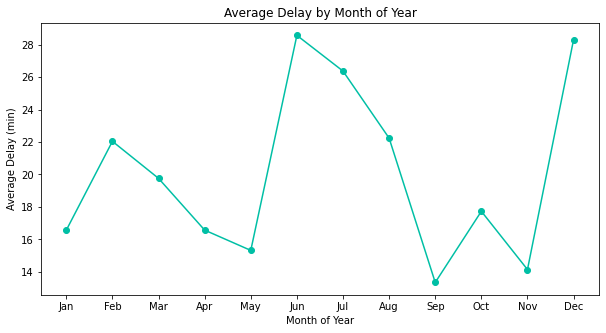

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(delay_df['Month'], delay_df['AvgTotalDelay'], marker='o', color = '#00bfa5')
plt.xticks(month_of_year)
plt.xlabel('Month of Year')
plt.ylabel('Average Delay (min)')
plt.title('Average Delay by Month of Year')
plt.show()